# Analysis of Capital Bikeshare of Washington, D.C in 2021
## by Ajibade Adeleke


## Investigation Overview
For the presentation, I focus on customer habits in 2021. Since capital bikeshare System currently offers 2 subscription types: Member and Casual. I start by introducing number counts and the percentage of customers who use the system occasionally and those who have a membership. Afterward, I move to the bike type mostly used by customers and then trend analysis of bike counts by month and day. I use the heatmap to show when bikes are high in demand throughout the week and hours of the day.


## Dataset Overview
The data consists of approximately 2.7M bike rides with 13 features, with features of interest such as start/end station name, bike ride type and user type. Trips with less than 60 seconds and on the same station were removed as they could be potentially false starts or users trying to re-dock a bike to ensure it's secure

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('capital_bikeshare_master_clean.csv')

# change data type
dtypes = {'rideable_type':'category',
         'user_type': 'category',
         'started_at': 'datetime64',
         'ended_at':'datetime64'}

df = df.astype(dtypes)

# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'started_month_name':['January','February','March','April','May',
                                          'June','July','August','September','October','November','December'],
                   'started_weekday':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']}

for var in ordinal_var_dict:
    ordered = pd.api.types.CategoricalDtype(categories=ordinal_var_dict[var], ordered=True)
    df[var] = df[var].astype(ordered)

### User Type Count
Citibike system offers two types of suscription namely;
- **Casual**(Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass) 
- **Member**(Annual Member, 30-Day Member or Day Key Member) 

> Customers with a monthly or annual membership ("Members") make up 60% of all customers in citibike 2021 dataset that used the system. 40% were Casual riders ("Customers") using the bike share system.

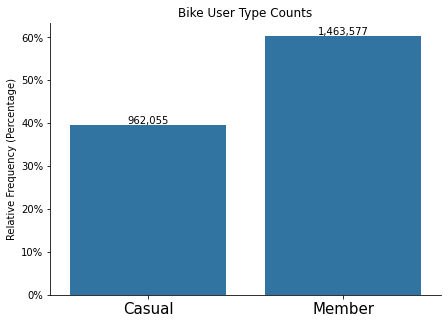

In [3]:
user_count = df.user_type.value_counts().reindex(['casual','member'])

#getting the total sum
total = user_count.sum()

#maximum proportion of user_type
max_prop = user_count[1]/total

#setting the ytick range and label
tick_prop = np.arange(0,max_prop,0.1)
tick_labels = ['{:.0f}%'.format(i*100) for i in tick_prop]

#Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]

plt.figure(figsize=[7,5])
ax = sns.countplot(data=df, x='user_type', color=base_color)
plt.yticks(tick_prop*total,tick_labels)
plt.ylabel('Relative Frequency (Percentage)')
plt.xlabel('')
ax.set_xticklabels(['Casual','Member'],fontsize=15)
plt.title('Bike User Type Counts')

for i in range(user_count.shape[0]):
    count = user_count[i]
    pct = '{:,}'.format(count)
    plt.text(i,count+50000,pct,va='top',ha='center')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Most Preferred Bike Type by Users
>The most used type of bike is the **Classic Bike** with about 82% of the whole dataset

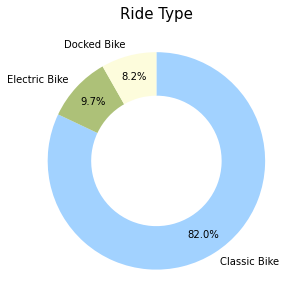

In [4]:
ridetype_count = df.rideable_type.value_counts()
labels = ridetype_count.index.str.title()

plt.figure(figsize=[10,5])
plt.pie(ridetype_count, labels=labels, colors=['#a2d2ff','#adc178', '#fdfcdc'], startangle=90, counterclock=False, 
        wedgeprops={'width':0.4}, autopct='%1.1f%%', pctdistance=0.8, 
        )
plt.title('Ride Type',fontsize=15);

## Time Series Analysis of Bike Rides Across Months

> There is an increasing number of bike trips starting in Spring (March). There was little decrease trend in August as the average temperature during that Summer period tends to be high. The highest number of trips was in October during the Fall, which is the driest season of the year, so users don't have to worry about rain spoiling their trip, unlike in Summer. There was a large decrease during the Winter season as it tends to be cold during that period coupled with snowfall.

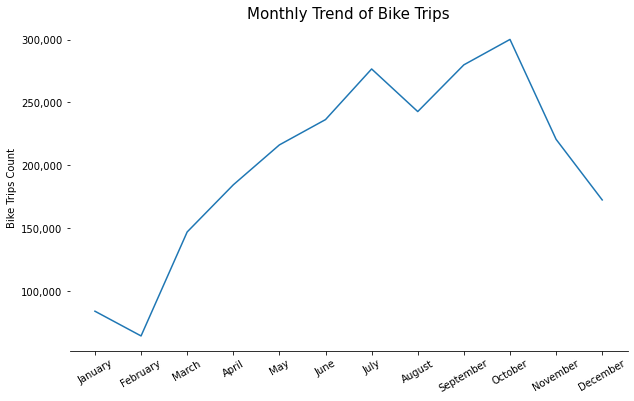

In [5]:
# Time Series trend of bike trips across months

month_count = df.started_month_name.value_counts().reindex(ordinal_var_dict['started_month_name'])

fig = plt.figure(figsize=[10,6])
ax = sns.lineplot(x=month_count.index.values, y=month_count, color=base_color)
plt.xticks(rotation=30)
plt.ylabel('Bike Trips Count')
plt.title('Monthly Trend of Bike Trips',fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# add commas to ytick numbers
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));

## Number of Bike Rides per Day
> The highest number of bike trips per day was on the 4th of July, which is a federal holiday in the United States commemorating the Declaration of Independence.

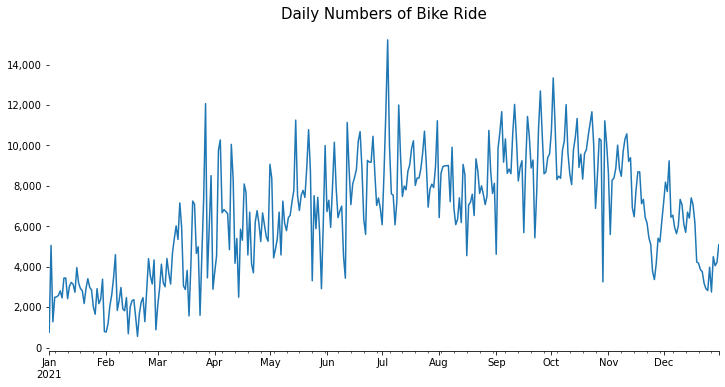

In [6]:
# Numbers of daily bike trips trend

# creating a copy of cleaned dataframe
daily = df.copy()
#setting 'started_at' column to index
daily.set_index('started_at', inplace=True)


plt.figure(figsize=[12,6])
#using resampling method to get the number of trips per day
# by using ride_id as the unique identifier count
ax = daily['ride_id'].resample('D').size().plot(kind='line', color=base_color)
plt.title('Daily Numbers of Bike Ride', fontsize=15)
plt.xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));

## In what time of the day are Bike Trips made
> The distribution is unimodally skewed to the left. There is an increasing number of bike rides from 8 am up till 5 pm which is the peak of the plot, and then a decrease in the bike trips at night time.

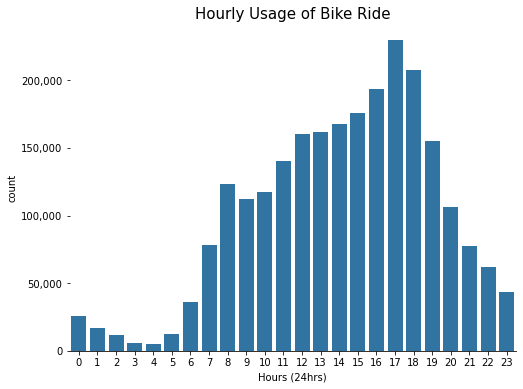

In [7]:
# Hourly use of bike system

plt.figure(figsize=[8,6])
ax = sns.countplot(data=df, x='started_hour', color=base_color)
plt.xlabel('Hours (24hrs)')
plt.title('Hourly Usage of Bike Ride',fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));

## Which User  and Bike Type has Longer Trip Duration
> There is a longer average trip duration for **Casual** users of about 1200seconds (20 minutes) compare to **Member** users with an average of 600seconds (10 minutes), which is about half the average trip duration of casual users. And for ride type, there is more average length of duration of docked bike (even thou it has the least usage) having an average of 1700seconds (29 minutes) compare to Classic bikes and Electric bikes having almost the same average length duration of 700seconds (11 minutes).

  user_type  Avg trip duration
0    casual             1146.0
1    member              601.0 

   rideable_type  Avg trip duration
0   classic bike              702.0
1    docked bike             1754.0
2  electric bike              787.0 



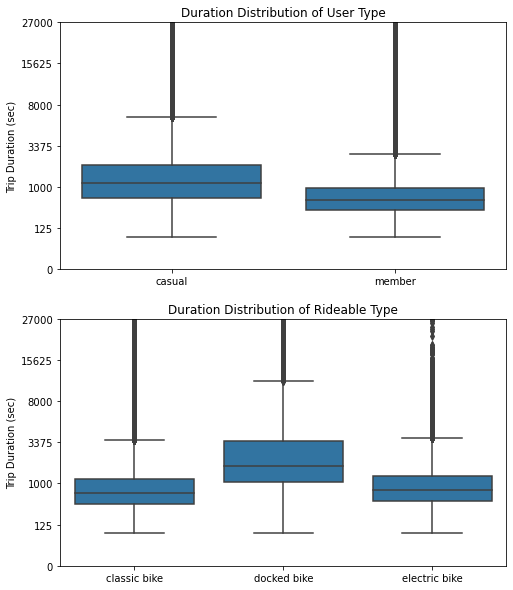

In [8]:
# creating a cube root function
def cube_root(x, inverse=False):
    if not inverse:
        return np.cbrt(x)
    else:
        return x**3

#Boxplot will be use to show the median trip duration btw each categories

col = ['user_type', 'rideable_type']
plt.figure(figsize=[8,10])

for i in range(len(col)):
    ax = plt.subplot(2,1,i+1)
    sns.boxplot(x=df[col[i]], y=df['duration_sec'].apply(cube_root), color=base_color)
    ax.set_ylim(0,30)
    ax.set(ylabel='Trip Duration (sec)', xlabel='')
    ax.title.set_text('Duration Distribution of {}'.format(col[i].replace('_',' ').title()))
    tick = [0,5,10,15,20,25,30]
    plt.yticks(tick, cube_root(np.array(tick),inverse=True));
    
    print(df.groupby([col[i]])['duration_sec'].median().reset_index(name='Avg trip duration'),'\n')

## What days of the week and time each users are active

> **Member**
>- Users are active during commute hours (7-8 am and 5-7 pm) and every so often during lunch hours of weekdays (Mon - Fri) and are less active on the weekend.
>- There is more activity during the late evening (5-7 pm) of the weekdays and early hours (7-8 am), and this could mean that there is more use of the bike on way back from work compared to in the early morning hours where a user might be running late and decides to take the bus.

>**Casual**
>- Users are more active during the weekend from 9 am to 7 pm and very less active during the weekday. Although occasionally active during the late evening (5 pm - 7 pm) of all days of the week which could mean an evening bike ride stroll.


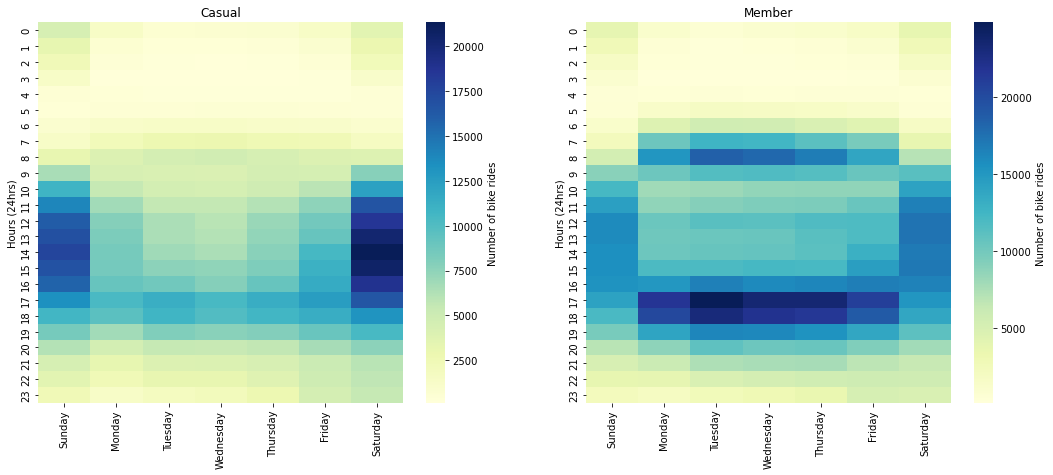

In [9]:
users = ['casual', 'member']
plt.figure(figsize=[18,7])
for i in range(len(users)):
    plt.subplot(1,2,i+1)
    user = df.loc[df['user_type'] == users[i]].groupby(['started_weekday', 'started_hour'])['ride_id'].size().reset_index(name='count')
    user = user.pivot(index='started_hour', columns='started_weekday', values='count')
    ax = sns.heatmap(user, cmap='YlGnBu', cbar_kws={'label':'Number of bike rides'})
    ax.set(xlabel='', ylabel='Hours (24hrs)', title=users[i].capitalize())

### Summary
Capital bikeshare System is a fantastic both healthy and environmentally friendly way of moving around in the metro areas, both for pleasure and work. There are two types of clients namely; Members (which make up 60% of bike trips) and Casuals (40% of bike trips). It can be concluded that member users use the system as a means of commuting to work during the weekdays around (8-9 am and 5-7 pm) and every so often around lunchtime. Casual users which are mainly tourists or occasional riders are more active during the weekends along and also sometimes in the late evening of all the days of the week.

In [ ]:
!jupyter nbconvert  --to slides --post serve --no-input --no-prompt